In [1]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

os.chdir("C:\\Users\\Starrism.Jia\\Documents\\python daima\\LDA test\\result")
output_path ='C:\\Users\\Starrism.Jia\\Documents\\python daima\\LDA test\\result'
file_path='C:\\Users\\Starrism.Jia\\Documents\\python daima\\LDA test\\data'
os.chdir(file_path)
data=pd.read_excel("gift all.xlsx")
dic_file="C:\\Users\\Starrism.Jia\\Documents\\python daima\\LDA test\\stop_dict\\dict.txt"
stop_file="C:\\Users\\Starrism.Jia\\Documents\\python daima\\LDA test\\stop_dict\\stopwords.txt"

def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r','',line)
        stop_list.append(line)
    
    #jiba 分词
    word_list = []
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:
                find =1
                break
        if find ==0 and seg_word.flag in flag_list:
            word_list.append (word)
    return (" ").join(word_list)

data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Starrism.Jia\AppData\Local\Temp\jieba.cache
Loading model cost 0.523 seconds.
Prefix dict has been built successfully.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
def print_top_words(model,feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)                                                         #打印不同主题
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])   
        tword.append(topic_w)
        print(topic_w)
    return tword

In [4]:
n_features = 100
tf_vectorizer = CountVectorizer(strip_accents ='unicode',     #去除文本中的重音符号
                                max_features=n_features,      #只选取词频最高的 n_features（即 100 个）特征词来构建向量
                                stop_words='english', 
                                max_df = 0.6,     #一个词如果在超过 60\% 的文档中都出现了，那么就将其视为高频词并过滤掉，
                                min_df = 10)     #一个词如果在低于 10\% 的文档中都出现了，那么就将其视为低 频词并过滤掉，
tf = tf_vectorizer.fit_transform(data.content_cutted)

ValueError: max_df corresponds to < documents than min_df

In [13]:
n_topics=5         #主题个数
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,   #模型训练的最大迭代次数为 50 次
                                learning_method='batch',           #批量学习的方式来训练模型
                                learning_offset=50,         #偏移量参数
                                doc_topic_prior=0.1,        #文档 - 主题先验概率
                                topic_word_prior=0.01,      #主题 - 词先验概率
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_offset=50, max_iter=50,
                          n_components=5, random_state=0,
                          topic_word_prior=0.01)

In [14]:
n_top_words =20         #每个主题词展示高频词个数
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
随礼 前提 金额 情感 条件 生意人 工资 感情 利益 基本上 能力 成分 情谊 关系网 行业 标准 区别 医生 双方 红包
Topic #1:
经济 层面 情境 能力 时间 名额 学生 对面 姐姐 学校 定义 客人 客户 家庭 家长 领导 小事 大润发 小孩 小朋友
Topic #2:
个人 价值 违法 层面 小事 人情 小朋友 区别 交流 同事 亲戚 心理 家长 利益 时间 文化 糟粕 现象 界限 性质
Topic #3:
时间 价值 亲人 极端 送礼者 标准 现象 小事 比例 定义 场景 年龄 同学 成分 层面 学校 学生 领导 家长 客人
Topic #4:
购物 基本上 学生 长辈 制度 特权 同学 学校 工作 成本 大润发 样子 办法 办事 方法 奶茶 家长 块钱 特殊性 消品


In [8]:
import pyLDAvis
import pyLDAvis.sklearn

In [9]:
pyLDAvis.enable_notebook()                                      #将 pyLDAvis 设置为在 Jupyter 笔记本环境下工作
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)          #函数调用
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')       #保存为网页结果
pyLDAvis.show(pic,open_browser=False, local=False)
pyLDAvis.show(pic)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]

stopping Server...

Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [25/Dec/2024 19:34:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:28] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:28] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:28] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:28] code 404, message Not Found
127.0.0.1 - - [25/Dec/2024 19:34:28] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Dec/2024 19:34:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:38] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:38] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:38] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2024 19:34:38] code 404, message Not Found
127.0.0.1 - - [25/Dec/2024 19:34:38] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


1
2
3
4
5
6
7
8
9


D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22256 (\N{CJK UNIFIED IDEOGRAPH-56F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24785 (\N{CJK UNIFIED IDEOGRAPH-60D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabt

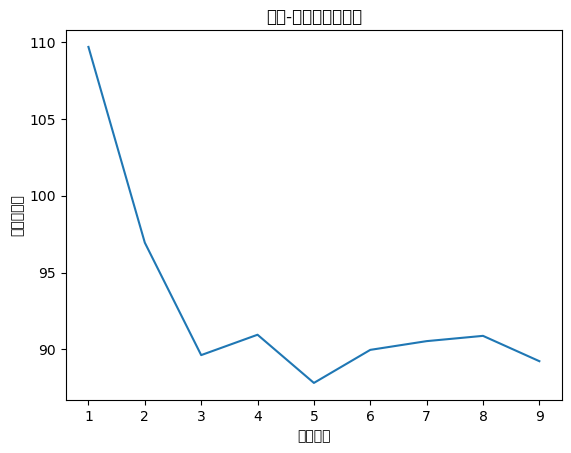

In [8]:
plexs = []       #存储不同主题数目下模型的困惑度
scores = []      #模型得分
for i in range(1,10):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)                    
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))
    
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')  

x=list(range(1,10))
y = plexs[0:9]
plt.plot(x,y)
plt.xlabel('主题数目')
plt.ylabel('困惑度大小')
plt.title('主题-困惑度变化情况')
plt.show()

In [156]:
plt.savefig('image.png')

<Figure size 640x480 with 0 Axes>